In [1]:
import sys
sys.path.insert(1, '../src')
import data_sources as dts
from pathlib import Path

import ee
import geemap
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

In [2]:
country = 'Mexico'
city = 'Mérida'

In [3]:
data_path = Path('../data')
cache_path = data_path / f'cache/{country}-{city}'

In [4]:
cache_path.exists()

True

In [5]:
#dts.train_urb_model(cache_path)

In [6]:
#dts.make_gisa_pred(2021, cache_path)

In [7]:
#gisa_file = cache_path / 'gisa-2021.tif'
#gisa = rxr.open_rasterio(gisa_file)

In [8]:
#gisa.plot()
#plt.show()

In [9]:
import boto3
s3Client = boto3.client('s3') 
#s3Client = boto3.resource('s3')

In [10]:
year = 2021

In [11]:
file_name = 'landsat-'+str(year)+'.tif'
ls_path = cache_path / file_name

In [12]:
file_name, ls_path

('landsat-2021.tif', PosixPath('../data/cache/Mexico-Mérida/landsat-2021.tif'))

In [13]:
s3_key = f'GEE/{country}-{city}/landsat-{year}.tif'
s3_key

'GEE/Mexico-Mérida/landsat-2021.tif'

In [14]:
#s3Client.download_file('tec-expansion-urbana-p', s3_key, str(ls_path))

In [15]:
service_account = 'pred-exp-deault@predictor-de-expansion.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, 'privatekey.json')
ee.Initialize(credentials)

In [16]:
import time

Downloading: Data from 2015
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2015.tif
Downloading: Data from 2016
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2016.tif
Downloading: Data from 2017
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2017.tif
Downloading: Data from 2018
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2018.tif
Downloading: Data from 2019
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2019.tif
Downloading: Data from 2020
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2020.tif
Downloading: Data from 2021
Data downloaded to ../data/cache/Mexico-Mérida/landsat-2021.tif
Done.
Data downloaded to ../data/cache/Mexico-Mérida/copernicus-2015.tif
Data downloaded to ../data/cache/Mexico-Mérida/copernicus-2016.tif
Data downloaded to ../data/cache/Mexico-Mérida/copernicus-2017.tif
Data downloaded to ../data/cache/Mexico-Mérida/copernicus-2018.tif
Data downloaded to ../data/cache/Mexico-Mérida/copernicus-2019.tif
Done.
Data down

/Users/ReidLB/Documents/BID/predictor-de-expansion/notebooks/../src/data_sources.py:508: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  utm.intersection(


Data downloaded to ../data/cache/Mexico-Mérida/protected.tif
Done.
Done.
Making GISA predictions ...
Model does not exist. Training ...
Model saved to ../data/cache/Mexico-Mérida/urb_model.pkl


/Users/ReidLB/Documents/BID/predictor-de-expansion/notebooks/../src/data_sources.py:1319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landsat_dataframe_cleaned["Gisa"] = gisa_predicted


Data downloaded to ../data/cache/Mexico-Mérida/gisa-2020.tif


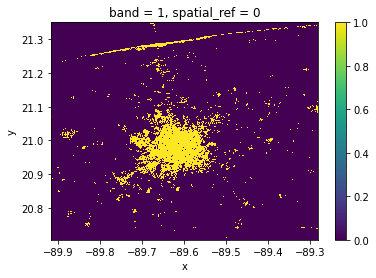

Done.
Model already exists.
True


/Users/ReidLB/Documents/BID/predictor-de-expansion/notebooks/../src/data_sources.py:1319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landsat_dataframe_cleaned["Gisa"] = gisa_predicted


Data downloaded to ../data/cache/Mexico-Mérida/gisa-2021.tif


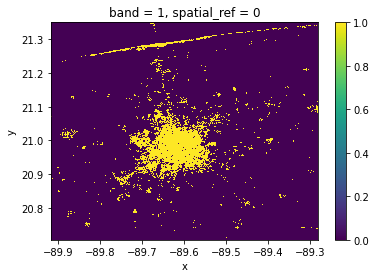

Done.
510.8092579841614


In [17]:
start = time.time()
dts.download_rasters(country, city, data_path, s3Client, buff=10)
end = time.time()
print(end - start)